In [1]:
import pandas as pd 
import numpy as np

In [2]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score 
from sklearn.model_selection import GridSearchCV

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 


In [4]:
data = load_iris() 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['target'] = data.target

In [5]:
print(df.head()) 
print(df.info())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float

In [6]:
df.iloc[0, 0] = np.nan 
X = df.drop("target", axis=1) 
y = df["target"] 
numeric_features = X.columns.tolist() 
numeric_transformer = Pipeline(steps=[ 
    ("imputer", SimpleImputer(strategy="mean")),         
    ("scaler", StandardScaler())                        
])

In [7]:
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [8]:
preprocessor = ColumnTransformer( 
    transformers=[ 
        ("num", numeric_transformer, numeric_features) 
    ] 
) 

In [11]:
# Define the pre_processor function
def pre_processor(data):
    # Example: remove nulls and lowercase column names
    data = data.dropna()
    data.columns = [col.lower() for col in data.columns]
    return data

# Example usage
import pandas as pd

# Dummy data
raw_data = pd.DataFrame({
    'Name': ['Alice', 'Bob', None],
    'Age': [25, None, 30]
})

# Call the function
processed_data = pre_processor(raw_data)

# View result
print(processed_data)



    name   age
0  Alice  25.0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
model = RandomForestClassifier(random_state=42) 
clf = Pipeline(steps=[ 
("preprocessor", preprocessor), 
("classifier", model) 
])

In [13]:
clf 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['sepal length (cm)',
                                                   'sepal width (cm)',
                                                   'petal length (cm)',
                                                   'petal width (cm)'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [14]:
clf.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['sepal length (cm)',
                                                   'sepal width (cm)',
                                                   'petal length (cm)',
                                                   'petal width (cm)'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [15]:
param_grid = { 
'classifier__n_estimators': [50, 100], 
'classifier__max_depth': [3, 5, None] 
} 

In [16]:
grid_search = GridSearchCV(clf, param_grid, cv=5) 
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['sepal '
                                                                          'length '
                                                                          '(cm)',
                                                                          'sepal '
                                                                          'width '
                                                                          '(cm)',
                                                                          'petal '
                                                                          'length '
                                                                          '(cm)',
                                                                          'petal '
                                                                          'width '
                                                                          '(cm)'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [3, 5, None],
                         'classifier__n_estimators': [50, 100]})

In [17]:
print("Best parameters found:", grid_search.best_params_)


Best parameters found: {'classifier__max_depth': 3, 'classifier__n_estimators': 50}


In [18]:
param_grid

{'classifier__n_estimators': [50, 100], 'classifier__max_depth': [3, 5, None]}

In [19]:
y_pred = grid_search.predict(X_test)

In [20]:
print("Classification Report:\n", classification_report(y_test, y_pred)) 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [25]:
if True:
    y_prob = grid_search.predict_proba(X_test)[:, 1]

In [35]:
from sklearn.metrics import roc_auc_score

print("ROC AUC Score:", roc_auc_score(y_test, y_prob, multi_class='ovr'))



ROC AUC Score: 1.0


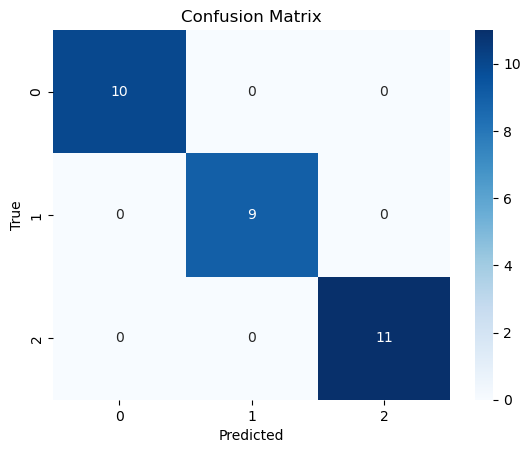

In [36]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues") 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.show()

In [37]:
final_model = grid_search.best_estimator_ 
final_model 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['sepal length (cm)',
                                                   'sepal width (cm)',
                                                   'petal length (cm)',
                                                   'petal width (cm)'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=3, n_estimators=50,
                                        random_state=42))])